In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from datetime import date

schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", DoubleType()),
    StructField("order_date", DateType())
])

data = [
    ("O001", "South", "Electronics", 3, 15000, date(2025, 1, 5)),
    ("O002", "North", "Clothing", 5, 2000, date(2025, 1, 6)),
    ("O003", "East", "Furniture", 2, 12000, date(2025, 1, 7)),
    ("O004", "West", "Electronics", 1, 18000, date(2025, 1, 8)),
    ("O005", "North", "Furniture", 4, 9000, date(2025, 1, 10)),
    ("O006", "South", "Clothing", 6, 2500, date(2025, 1, 11)),
    ("O007", "East", "Electronics", 2, 17000, date(2025, 1, 12)),
    ("O008", "South", "Furniture", 5, 8500, date(2025, 1, 15)),
    ("O009", "West", "Clothing", 7, 3000, date(2025, 1, 17)),
    ("O010", "North", "Electronics", 4, 16000, date(2025, 1, 18))
]

df = spark.createDataFrame(data, schema)
df.show(10)


+--------+------+-----------+--------+-------+----------+
|order_id|region|   category|quantity|  price|order_date|
+--------+------+-----------+--------+-------+----------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|
|    O010| North|Electronics|       4|16000.0|2025-01-18|
+--------+------+-----------+--------+-------+----------+



In [0]:
from pyspark.sql.functions import col

df = df.withColumn("revenue", col("quantity") * col("price"))
df.show()


+--------+------+-----------+--------+-------+----------+-------+
|order_id|region|   category|quantity|  price|order_date|revenue|
+--------+------+-----------+--------+-------+----------+-------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|45000.0|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|10000.0|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|24000.0|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|18000.0|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|36000.0|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|15000.0|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|34000.0|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|42500.0|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|21000.0|
|    O010| North|Electronics|       4|16000.0|2025-01-18|64000.0|
+--------+------+-----------+--------+-------+----------+-------+



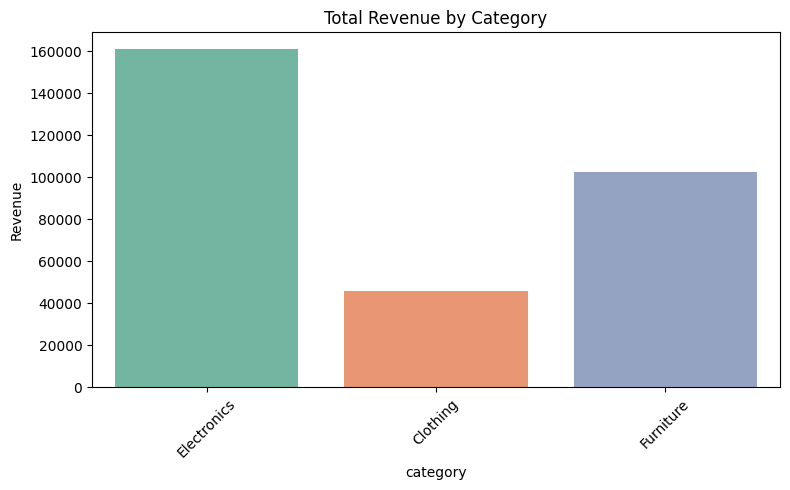

In [0]:
# Aggregate
rev_by_cat = df.groupBy("category").sum("revenue").toPandas()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=rev_by_cat, x="category", y="sum(revenue)", palette="Set2")
plt.title("Total Revenue by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/tmp/revenue_by_category.png")
plt.show()


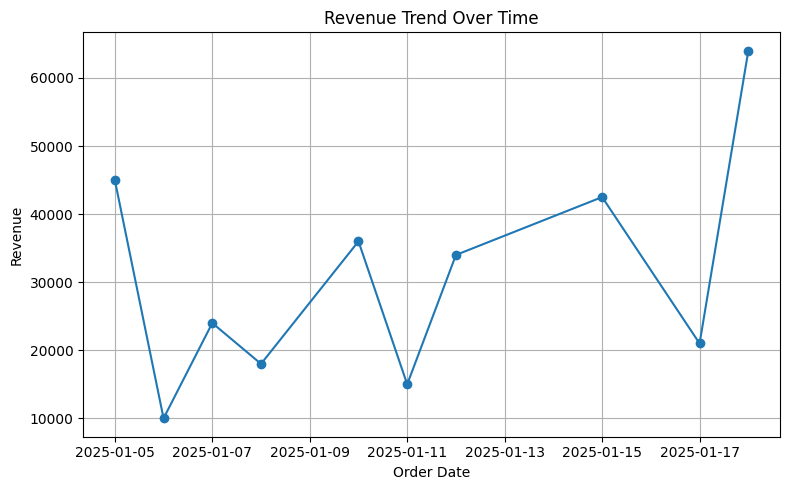

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843872>, line 14
     12 plt.grid(True)
     13 plt.tight_layout()
---> 14 plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_trend.png")
     15 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_set(facecolor='none', edgecolor='none'))

In [0]:
rev_trend = df.groupBy("order_date").sum("revenue").orderBy("order_date").toPandas()

# Create the directory if it does not exist
import os
dbutils.fs.mkdirs("dbfs:/FileStore/tables/sales_viz/")

plt.figure(figsize=(8,5))
plt.plot(rev_trend["order_date"], rev_trend["sum(revenue)"], marker='o')
plt.title("Revenue Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_trend.png")
plt.show()


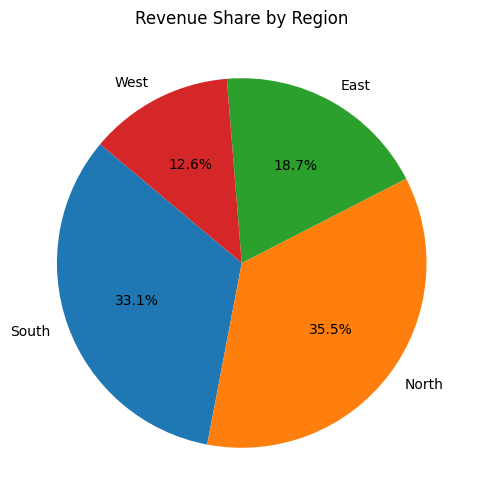

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843873>, line 6
      4 plt.pie(rev_by_region["sum(revenue)"], labels=rev_by_region["region"], autopct='%1.1f%%', startangle=140)
      5 plt.title("Revenue Share by Region")
----> 6 plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_pie_region.png")
      7 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axe

In [0]:
rev_by_region = df.groupBy("region").sum("revenue").toPandas()

plt.figure(figsize=(6,6))
plt.pie(rev_by_region["sum(revenue)"], labels=rev_by_region["region"], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Region")
plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_pie_region.png")
plt.show()


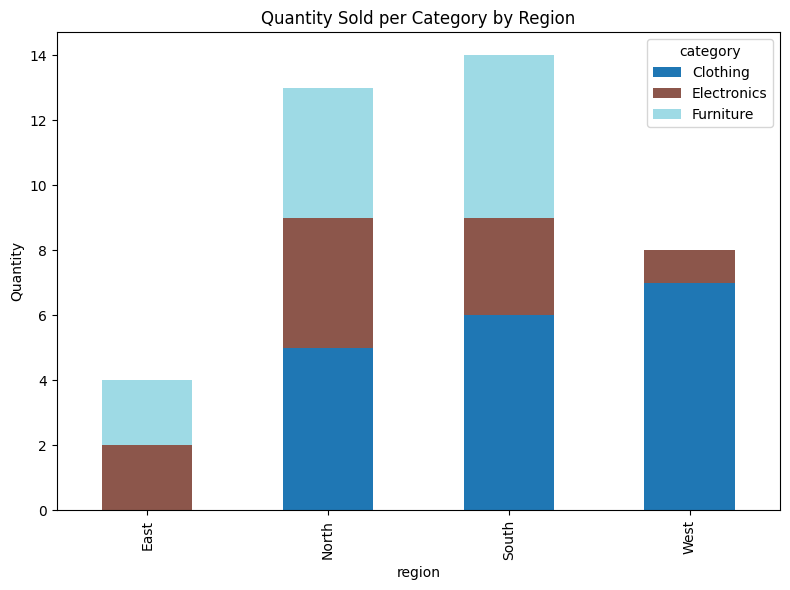

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843874>, line 8
      6 plt.ylabel("Quantity")
      7 plt.tight_layout()
----> 8 plt.savefig("/dbfs/tmp/stacked_qty_bar.png")
      9 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_set(facecolor='none', edgecolor='none'))
-> 3378 self.

In [0]:
qty_cat_region = df.groupBy("region", "category").sum("quantity").toPandas()
pivot = qty_cat_region.pivot(index="region", columns="category", values="sum(quantity)").fillna(0)

pivot.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab20")
plt.title("Quantity Sold per Category by Region")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig("/dbfs/tmp/stacked_qty_bar.png")
plt.show()


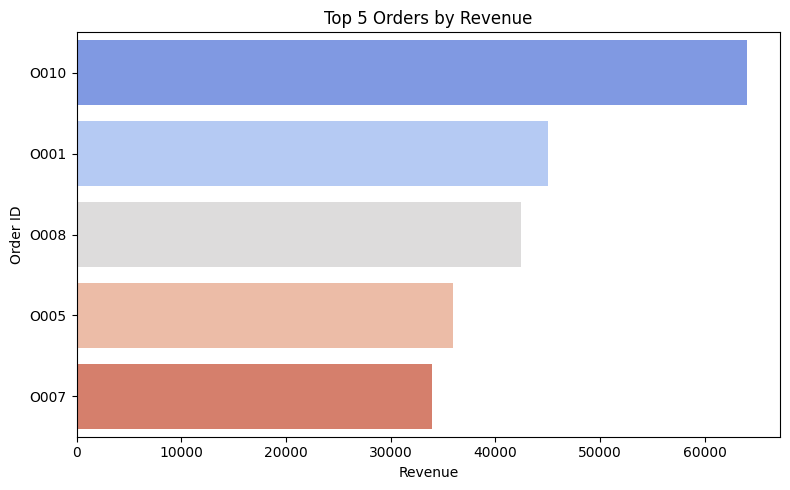

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843875>, line 9
      7 plt.ylabel("Order ID")
      8 plt.tight_layout()
----> 9 plt.savefig("/dbfs/FileStore/tables/sales_viz/top5_orders.png")
     10 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_set(facecolor='none', edgecolor='no

In [0]:
top5 = df.orderBy(col("revenue").desc()).limit(5).select("order_id", "revenue").toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=top5, x="revenue", y="order_id", palette="coolwarm")
plt.title("Top 5 Orders by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Order ID")
plt.tight_layout()
plt.savefig("/dbfs/FileStore/tables/sales_viz/top5_orders.png")
plt.show()


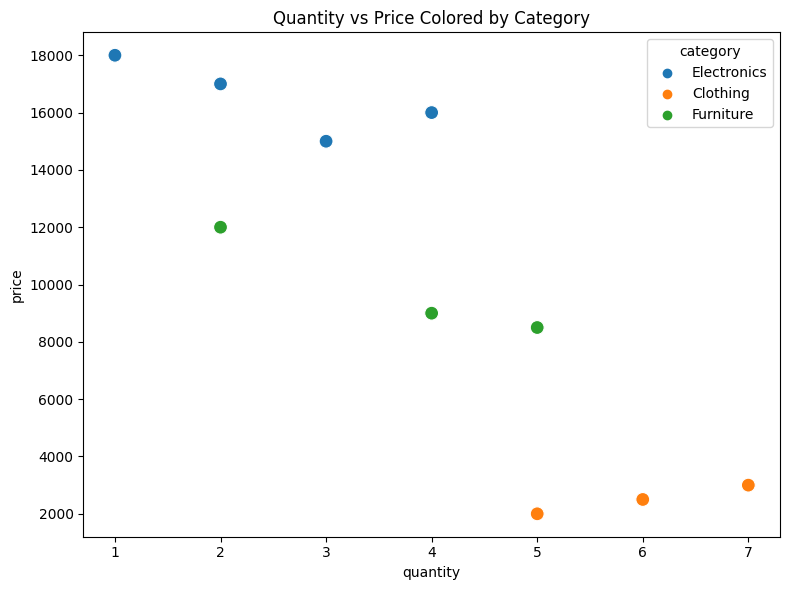

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843876>, line 7
      5 plt.title("Quantity vs Price Colored by Category")
      6 plt.tight_layout()
----> 7 plt.savefig("/dbfs/FileStore/tables/sales_viz/scatter_qty_price.png")
      8 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_s

In [0]:
scatter_data = df.select("quantity", "price", "category").toPandas()

plt.figure(figsize=(8,6))
sns.scatterplot(data=scatter_data, x="quantity", y="price", hue="category", s=100)
plt.title("Quantity vs Price Colored by Category")
plt.tight_layout()
plt.savefig("/dbfs/FileStore/tables/sales_viz/scatter_qty_price.png")
plt.show()


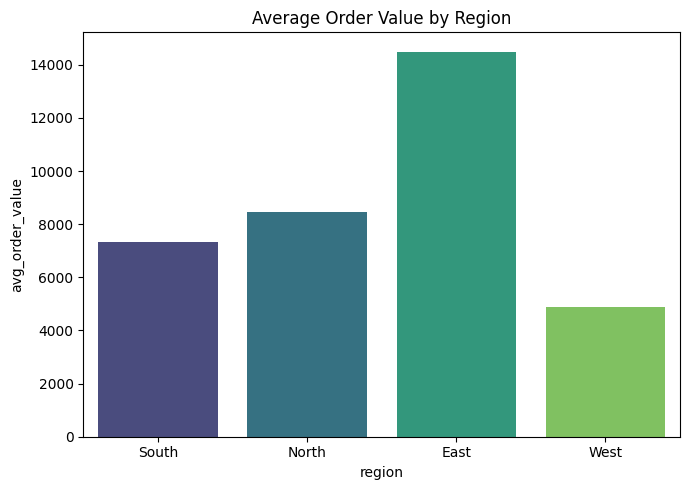

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843877>, line 16
     14 plt.title("Average Order Value by Region")
     15 plt.tight_layout()
---> 16 plt.savefig("/dbfs/FileStore/tables/sales_viz/avg_order_value.png")
     17 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_set(faceco

In [0]:
from pyspark.sql.functions import col, sum

# Aggregate the revenue and quantity first, then perform the division
agg_df = df.groupBy("region").agg(
    (sum("revenue") / sum("quantity")).alias("avg_order_value")
)

# Convert to Pandas DataFrame
avg_order = agg_df.toPandas()

# Plotting
plt.figure(figsize=(7,5))
sns.barplot(data=avg_order, x="region", y="avg_order_value", palette="viridis")
plt.title("Average Order Value by Region")
plt.tight_layout()
plt.savefig("/dbfs/FileStore/tables/sales_viz/avg_order_value.png")
plt.show()


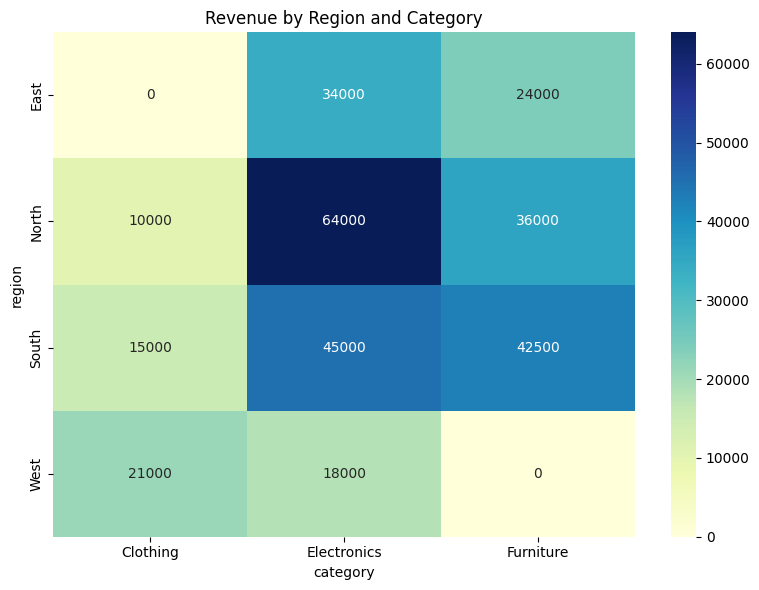

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843878>, line 8
      6 plt.title("Revenue by Region and Category")
      7 plt.tight_layout()
----> 8 plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_heatmap.png")
      9 plt.show()

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1020 @_copy_docstring_and_deprecators(Figure.savefig)
   1021 def savefig(*args, **kwargs):
   1022     fig = gcf()
-> 1023     res = fig.savefig(*args, **kwargs)
   1024     fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.
   1025     return res

File /databricks/python/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
   3374     for ax in self.axes:
   3375         stack.enter_context(
   3376             ax.patch._cm_set(faceco

In [0]:
heatmap_data = df.groupBy("region", "category").sum("revenue").toPandas()
pivot_heatmap = heatmap_data.pivot(index="region", columns="category", values="sum(revenue)").fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Region and Category")
plt.tight_layout()
plt.savefig("/dbfs/FileStore/tables/sales_viz/revenue_heatmap.png")
plt.show()


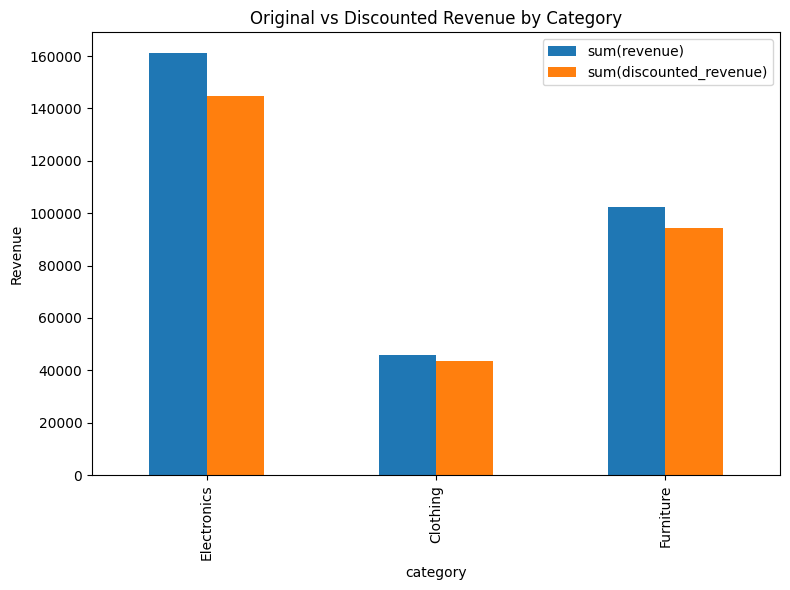

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-6835770043843879>, line 28
     26 # Create directory if it does not exist
     27 output_dir = "/dbfs/FileStore/tables/sales_viz/"
---> 28 os.makedirs(output_dir, exist_ok=True)
     30 # Save plot
     31 plt.savefig(os.path.join(output_dir, "discounted_vs_original.png"))

File <frozen os>:215, in makedirs(name, mode, exist_ok)

File <frozen os>:215, in makedirs(name, mode, exist_ok)

File <frozen os>:225, in makedirs(name, mode, exist_ok)

OSError: [Errno 5] Input/output error: '/dbfs/FileStore'

In [0]:
from pyspark.sql.functions import when, col
import matplotlib.pyplot as plt
import os

# Apply discounts
df_discounted = df.withColumn("discount_rate",
    when(col("category") == "Electronics", 0.10)
    .when(col("category") == "Clothing", 0.05)
    .when(col("category") == "Furniture", 0.08)
    .otherwise(0)
)

df_discounted = df_discounted.withColumn("discounted_revenue", col("revenue") * (1 - col("discount_rate")))

# Aggregate
revenue_comp = df_discounted.groupBy("category").agg(
    {"revenue": "sum", "discounted_revenue": "sum"}
).toPandas()

# Plot
revenue_comp.plot(x="category", kind="bar", figsize=(8,6))
plt.title("Original vs Discounted Revenue by Category")
plt.ylabel("Revenue")
plt.tight_layout()

# Create directory if it does not exist
output_dir = "/dbfs/FileStore/tables/sales_viz/"
os.makedirs(output_dir, exist_ok=True)

# Save plot
plt.savefig(os.path.join(output_dir, "discounted_vs_original.png"))
plt.show()
